### Setup

In [1]:
# Install required packages if not yet installed
# !pip install datasets matplotlib pandas

# Imports
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


/home/vipuser/miniconda3/envs/emoenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load GoEmotions Dataset

In [2]:
# Load GoEmotions dataset
dataset = load_dataset("go_emotions")

# Check available splits
print(dataset)

# Check a sample
print(dataset['train'][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


In [3]:
# Get the label names
label_names = dataset['train'].features['labels'].feature.names
print(label_names)


['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


/tmp/ipykernel_212606/2846690594.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


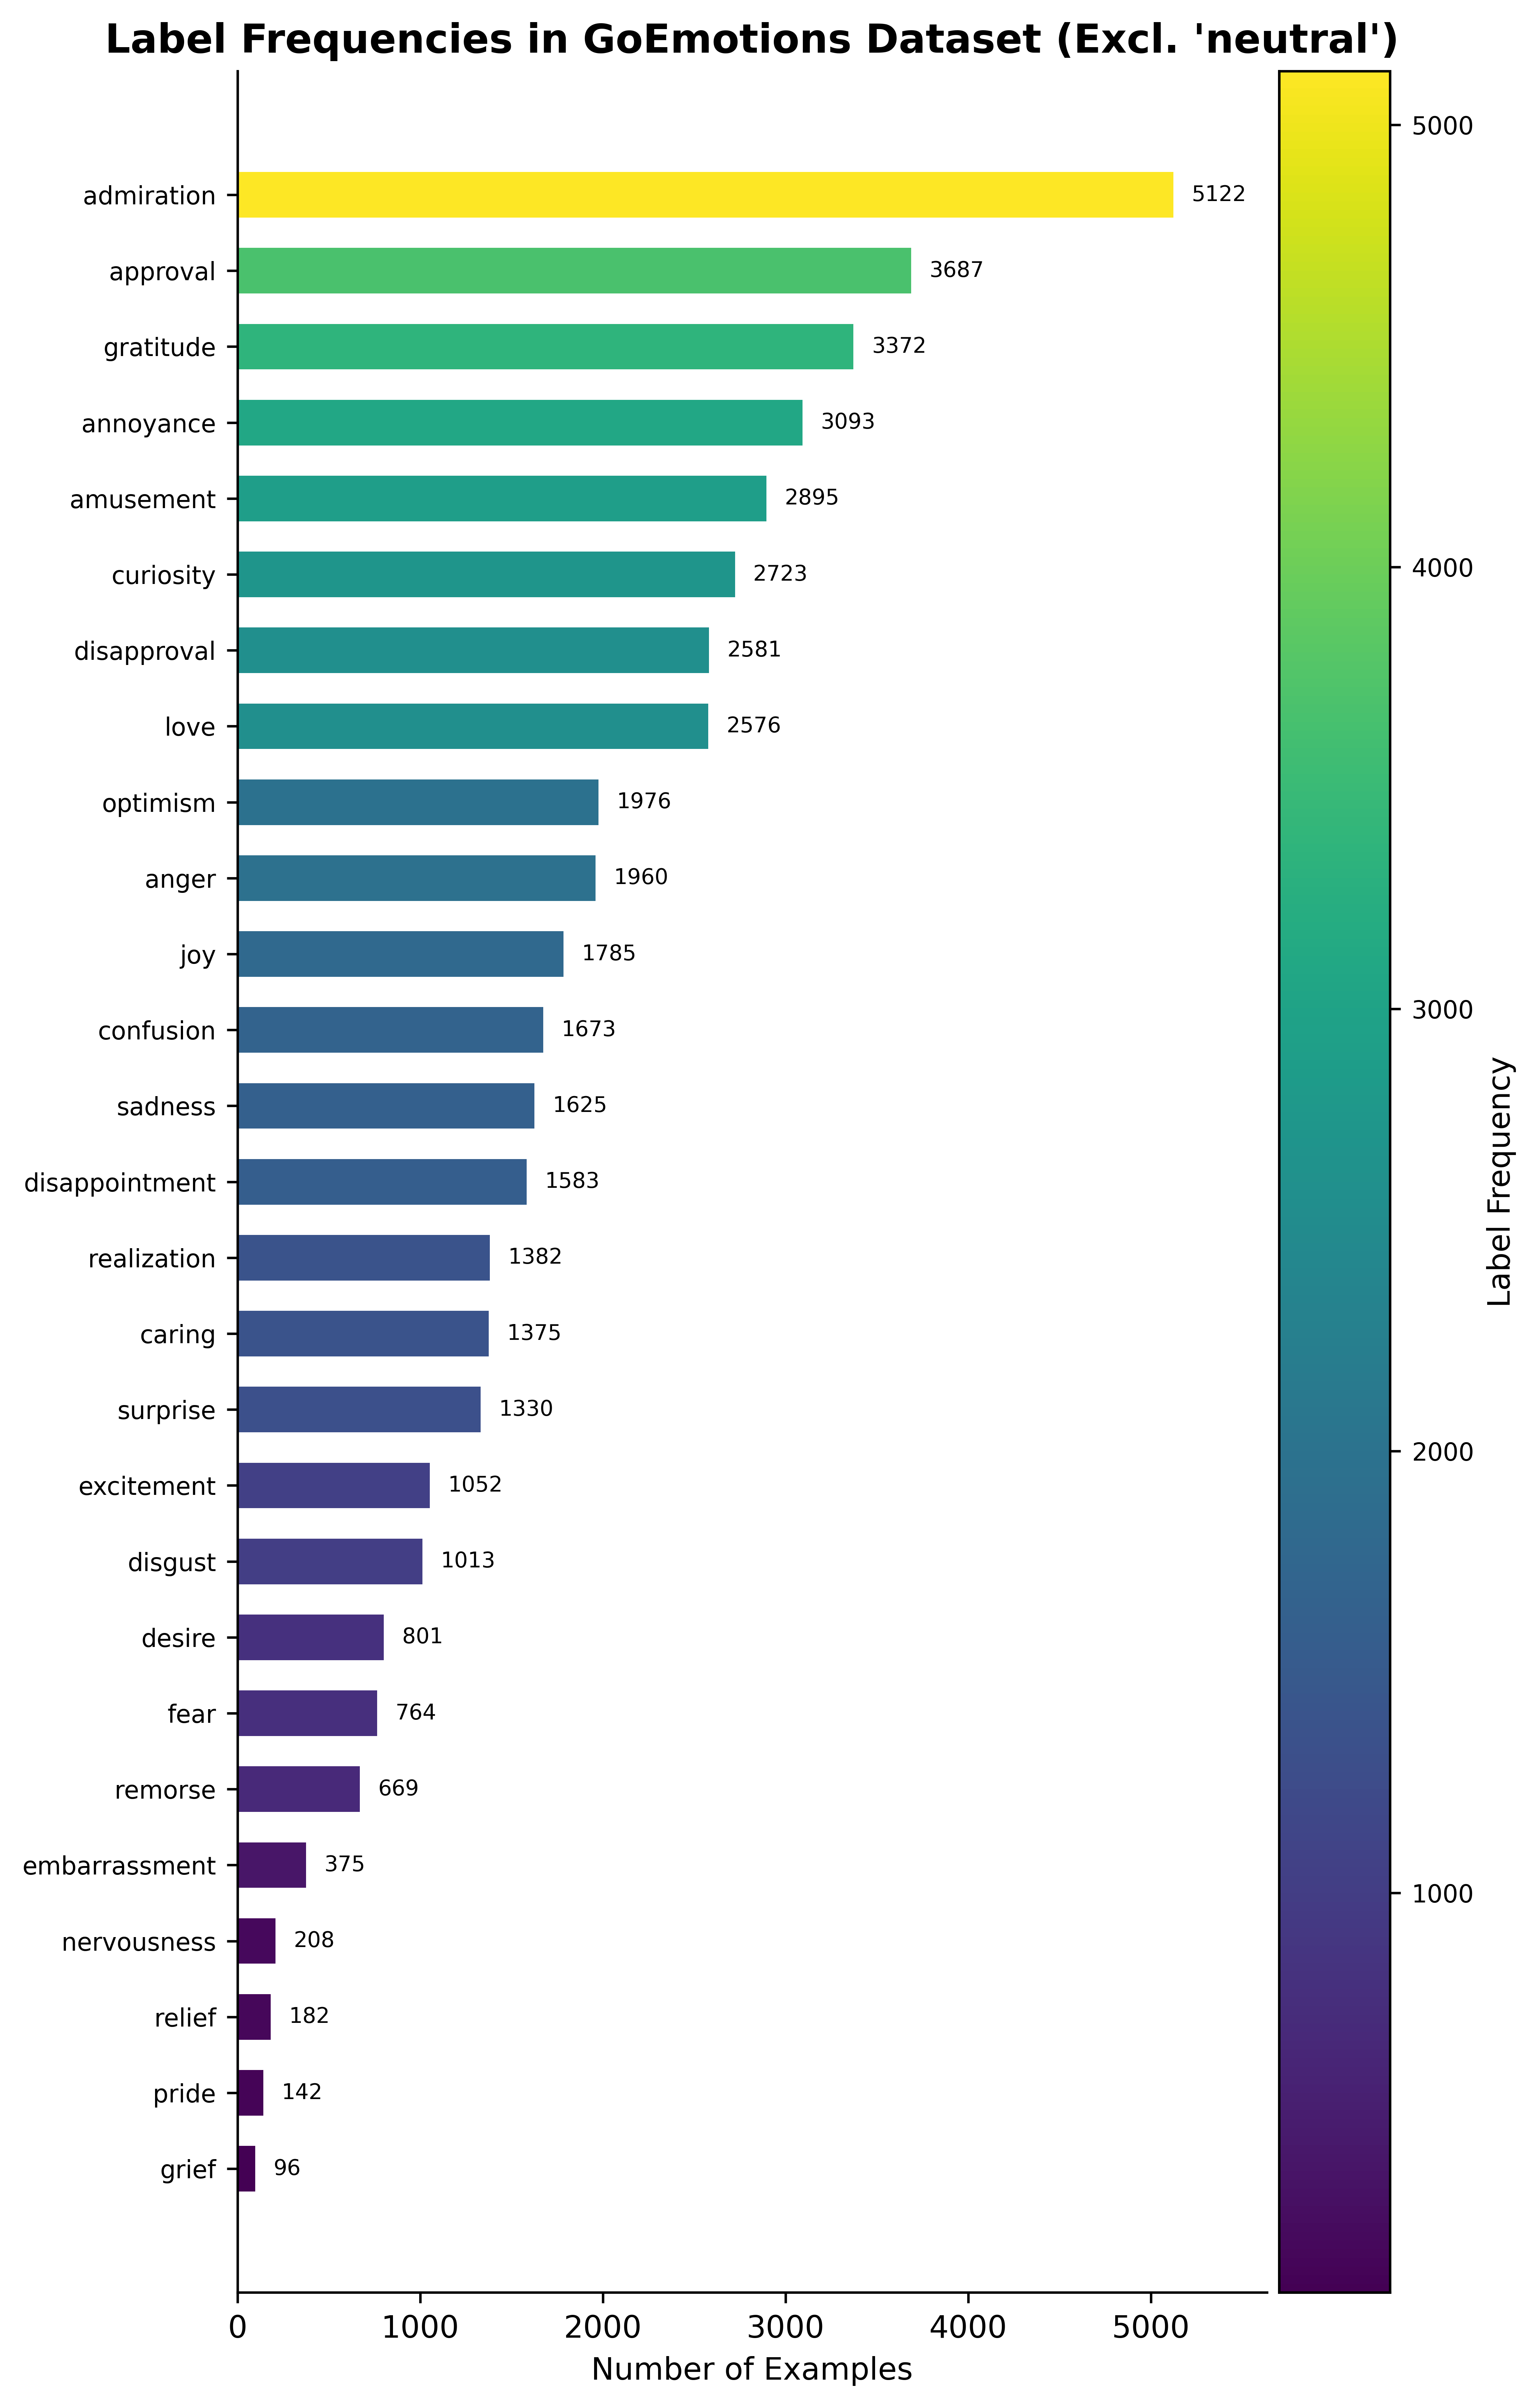

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from matplotlib import cm, colors as mcolors

# Step 1: Flatten labels from all splits
all_labels = [label for split in ['train', 'validation', 'test']
              for sample in dataset[split] for label in sample['labels']]

# Step 2: Count and map to label names
label_counts = Counter(all_labels)
label_counts_named = {label_names[i]: count for i, count in label_counts.items()}

# ✅ Remove 'neutral'
label_counts_named.pop('neutral', None)

# Step 3: Create and sort DataFrame
df = pd.DataFrame(list(label_counts_named.items()), columns=['label', 'count'])
df = df.sort_values(by='count', ascending=True).reset_index(drop=True)

# Step 4: Normalize counts for colormap
norm = mcolors.Normalize(vmin=df['count'].min(), vmax=df['count'].max())
cmap = cm.get_cmap('viridis')
bar_colors = cmap(norm(df['count'].values))

# Step 5: Plot
fig, ax = plt.subplots(figsize=(7, 11), dpi=600)
bar_width = 0.6
y_pos = range(len(df))
bars = ax.barh(y=y_pos, width=df['count'], color=bar_colors, height=bar_width)

# Step 6: Set y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df['label'], fontsize=8)

# Step 7: Annotate bars
for bar, count in zip(bars, df['count']):
    ax.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
            f'{count}', va='center', ha='left', fontsize=7)

# Step 8: Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label("Label Frequency", fontsize=10)
cbar.ax.tick_params(labelsize=8)

# ✅ Extend x-axis to make room for annotations
ax.set_xlim([0, df['count'].max() * 1.1])

# Step 9: Final styling
ax.set_title("Label Frequencies in GoEmotions Dataset (Excl. 'neutral')", fontsize=13, weight='bold')
ax.set_xlabel("Number of Examples", fontsize=10)
ax.set_ylabel("")
ax.tick_params(axis='x', labelsize=10)
sns.despine()
plt.tight_layout()


# Optional: Save
# plt.savefig("goemotions_excl_neutral_barplot.pdf", format='pdf', bbox_inches='tight')

plt.show()


In [29]:
import pandas as pd
from collections import Counter

# Step 1: Count number of labels per sample
num_labels_per_sample = [len(sample['labels']) for sample in dataset['train']]

# Step 2: Count frequency
label_counts = Counter(num_labels_per_sample)
total_samples = len(num_labels_per_sample)

# Step 3: Prepare table as DataFrame with percentages
table = pd.DataFrame({
    "Number of Labels": sorted(label_counts.keys()),
    "Number of Samples": [label_counts[k] for k in sorted(label_counts.keys())]
})
table["Percentage"] = table["Number of Samples"] / total_samples * 100
table["Percentage"] = table["Percentage"].map(lambda x: f"{x:.2f}%")

# Step 4: Display
print(table.to_string(index=False))


 Number of Labels  Number of Samples Percentage
                1              36308     83.64%
                2               6541     15.07%
                3                532      1.23%
                4                 28      0.06%
                5                  1      0.00%


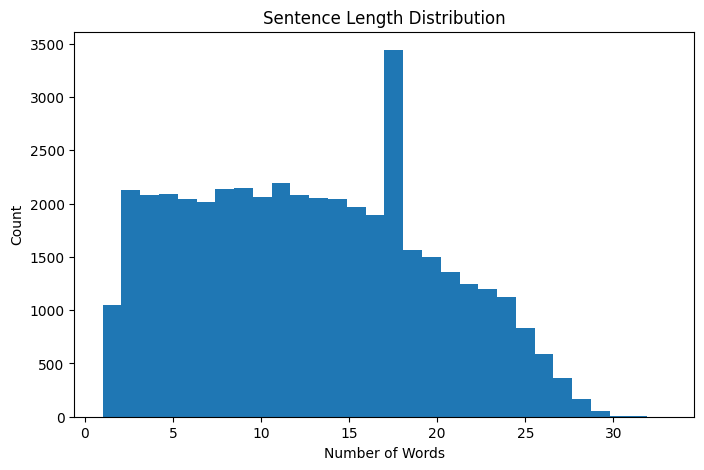

In [ ]:
# Check how long texts are (by word count)
sentence_lengths = [len(sample['text'].split()) for sample in dataset['train']]

plt.figure(figsize=(8,5))
plt.hist(sentence_lengths, bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()
